In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Simulation

Generate 1000 samples from two different classes of equal size
1. 500 samples from class 1 are generated here.

x_1 = [x_11, x_12]

In [ ]:
Number_of_points = 1000

mean = [-2.5, -2.5]

cov = [[1, 0], [0, 1]]

X_data = np.random.multivariate_normal(mean, cov, Number_of_points//2)
# print(X_data)
print(X_data.shape)

(500, 2)


In [ ]:
print(X_data)

[[-1.10421617 -2.89444275]
 [-2.1136031  -3.1330889 ]
 [-0.77800867 -2.76904624]
 [-3.270737   -0.21518284]
 [-2.63304733 -1.94608599]
 [-2.00083432 -0.65028592]
 [-0.54284691 -3.27815268]
 [-5.29825808 -3.43684088]
 [-3.88375341 -2.75754954]
 [-2.06487733 -4.72722153]
 [-3.10511973 -2.13847806]
 [-2.27471133 -1.96236379]
 [-4.0121443   0.32183481]
 [-2.04088665 -1.60632021]
 [-1.31593986 -3.47058064]
 [-2.34568168 -0.68391856]
 [-2.38765208 -2.92040559]
 [-3.21064806 -2.19301422]
 [-3.58356919 -0.26260151]
 [-3.24387283 -2.12247785]
 [-2.46668076 -1.65813311]
 [-2.82097006 -3.29641907]
 [-1.96533863 -0.29129157]
 [-2.02903259 -1.95319822]
 [-3.07363238 -2.56743832]
 [-1.05612491 -1.94586966]
 [-1.97389935 -2.91870759]
 [-3.3869405  -2.60196481]
 [-4.21490258 -2.59677191]
 [-0.85890011 -1.61656749]
 [-3.67933446 -3.43937002]
 [-3.869209   -3.68157359]
 [-3.69818739 -3.37074524]
 [-0.55489568 -2.81636003]
 [-2.63231881 -1.13106421]
 [-2.07386925 -2.68502256]
 [-1.36038887 -0.62056519]
 

2. A set of 500 samples from class 2 are generted here, by changing the mean of the cluster

In [ ]:
mean = [2.5,2.5]
# Create samples from class 2 with the above mean. Concatenate the samples from class 1 and class 2.
X_data = np.concatenate((X_data,np.random.multivariate_normal(mean, cov, Number_of_points//2)))

## Add class to the points generated
Y_data = np.zeros((Number_of_points,))
Y_data[Number_of_points//2:] = 1

## Training and Test Set Creation

In [ ]:
Number_of_training = int(Number_of_points*0.8)

Number_of_testing = int(Number_of_points*0.2)

## Randomly permute a sequence, or return a permuted range
index = np.random.permutation(Number_of_points)

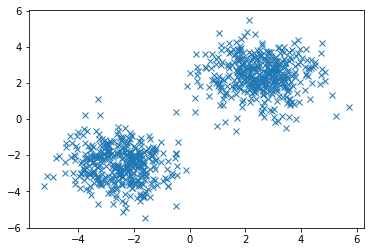

(800, 2) (800,)


In [ ]:
X_train = X_data[index[:Number_of_training]] 

Y_train = Y_data[index[:Number_of_training]]

## Plots the points generated
plt.plot(X_train[:,0],X_train[:,1],'x')

plt.show()

print(X_train.shape,Y_train.shape)

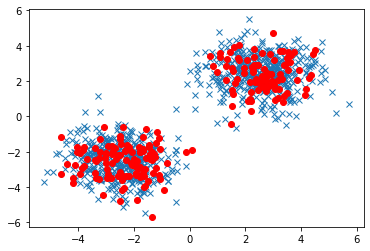

In [ ]:
X_test = X_data[index[Number_of_training:]]

Y_test = Y_data[index[Number_of_training:]]

## Plot train and test points in the same plot
plt.plot(X_train[:,0],X_train[:,1],'x')
## Add parameters for test points
plt.plot(X_test[:,0],X_test[:,1],'o',color='red')

plt.show()

## Learning a logisitc regression classifier

In [ ]:
# Import library
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
## ## Please note the default values e.g L-2  regularization by default
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)

print("Accuracy on training data: %f"%(clf.score(X_train, Y_train)))

print("Accuracy on test data: %f"%(clf.score(X_test, Y_test)))

Accuracy on training data: 1.000000
Accuracy on test data: 1.000000


### Visualizing the decision boundary

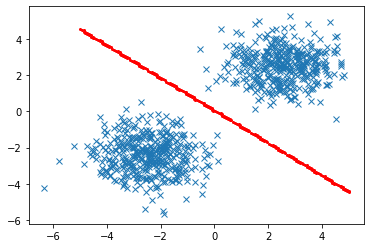

In [ ]:
eps = 0.0289
plt.plot(X_train[:,0],X_train[:,1],'x')

for i in np.linspace(-5,5,150):
    for j in np.linspace(-5,5,150):
        pred = clf.predict_proba([[i,j]])[0]
        if pred[0] >=  0.5 - eps and pred[0] <=0.5 + eps and pred[1] >=  0.5 - eps and pred[1] <=0.5+eps:
            plt.plot(i,j,'o',color = 'red',markersize=2)
    
plt.show()
        

## Iris Dataset - Multiclass Classification

In [ ]:

from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(X.shape)
print(y)
print(list(load_iris().target_names))


(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa', 'versicolor', 'virginica']


In [ ]:
## Create a model for Logistic Regression as done above
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200).fit(X,y)

print(clf.predict(X[:2, :]))
## predict_proba gives the probability estimates
print(clf.predict_proba(X[:1, :])) 
print(clf.score(X, y))

[0 0]
[[9.81583143e-01 1.84168427e-02 1.45011486e-08]]
0.9733333333333334


In [ ]:
new_observation = [[.5, .5, .5, .5]]
print(clf.predict(new_observation))
print(clf.predict_proba(new_observation))

[0]
[[9.98575782e-01 1.42420748e-03 1.00555016e-08]]


## Digits dataset - Multiclass Classification

In [ ]:
from sklearn.datasets import load_digits
## Each image is of size 8 X 8
digits = load_digits()

In [ ]:
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [ ]:
ls = [1,2,3,4]

for idx, val in enumerate(ls):
  print("index" + str(idx))
  print(val)

index0
1
index1
2
index2
3
index3
4


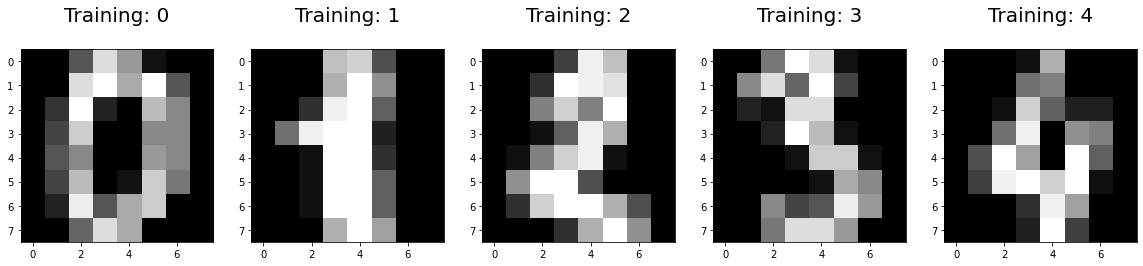

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
## Create a train test split with test size 75-25 split.
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


##### Hyperparameter Tuning - Method *1*

In [ ]:
## Method 1 
C = [0.0001, 0.1, 0.5]
for each_C in C:
  logisticRegr = LogisticRegression(C = each_C)
  logisticRegr.fit(x_train, y_train)
  score = logisticRegr.score(x_val, y_val)
  print("For C value {}, the score obtained is {}".format(each_C, score))




For C value 0.0001, the score obtained is 0.9305555555555556
For C value 0.1, the score obtained is 0.9791666666666666
For C value 0.5, the score obtained is 0.9791666666666666


In [ ]:
logisticRegr = LogisticRegression(C = 0.1)
logisticRegr.fit(x_train, y_train)
test_score = logisticRegr.score(x_test, y_test)
print(test_score)

0.9694444444444444


##### Hyperparameter tuning - Method 2 - Grid Search CV

In [ ]:
## Method 2
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs'], 'penalty':['l1', 'l2'], 'max_iter':[100, 500], 'C':[0.01, 0.1]}
logisticRegr = LogisticRegression()
clf = GridSearchCV(logisticRegr, parameters)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1], 'max_iter': [100, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(clf.best_params_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
score = clf.score(x_test, y_test)
print(score)

0.9583333333333334


Text(0.5, 15.0, 'Predicted')

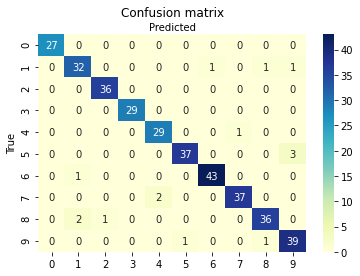

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = list(range(10))
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Practice Session

## Heart Disease Prediction using Logistic Regression

https://www.kaggle.com/ronitf/heart-disease-uci



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [ ]:
print(df.target.value_counts())

1    165
0    138
Name: target, dtype: int64


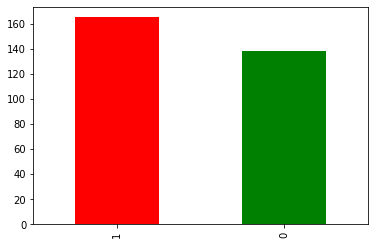

In [ ]:
df.target.value_counts().plot(kind="bar", color=["red", "green"])

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
for each_col in df.columns:
  print(each_col)
  print(df[each_col].unique())

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex
[1 0]
cp
[3 2 1 0]
trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs
[1 0]
reste

Text(0.5, 1.0, 'Distribution of cholesterol')

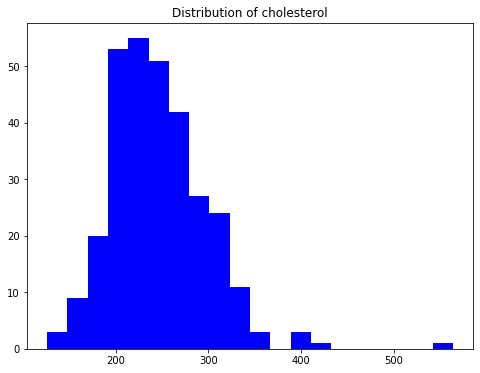

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(8, 6))

ax.hist(df['chol'], bins=20, facecolor='blue')
ax.set_title('Distribution of cholesterol')

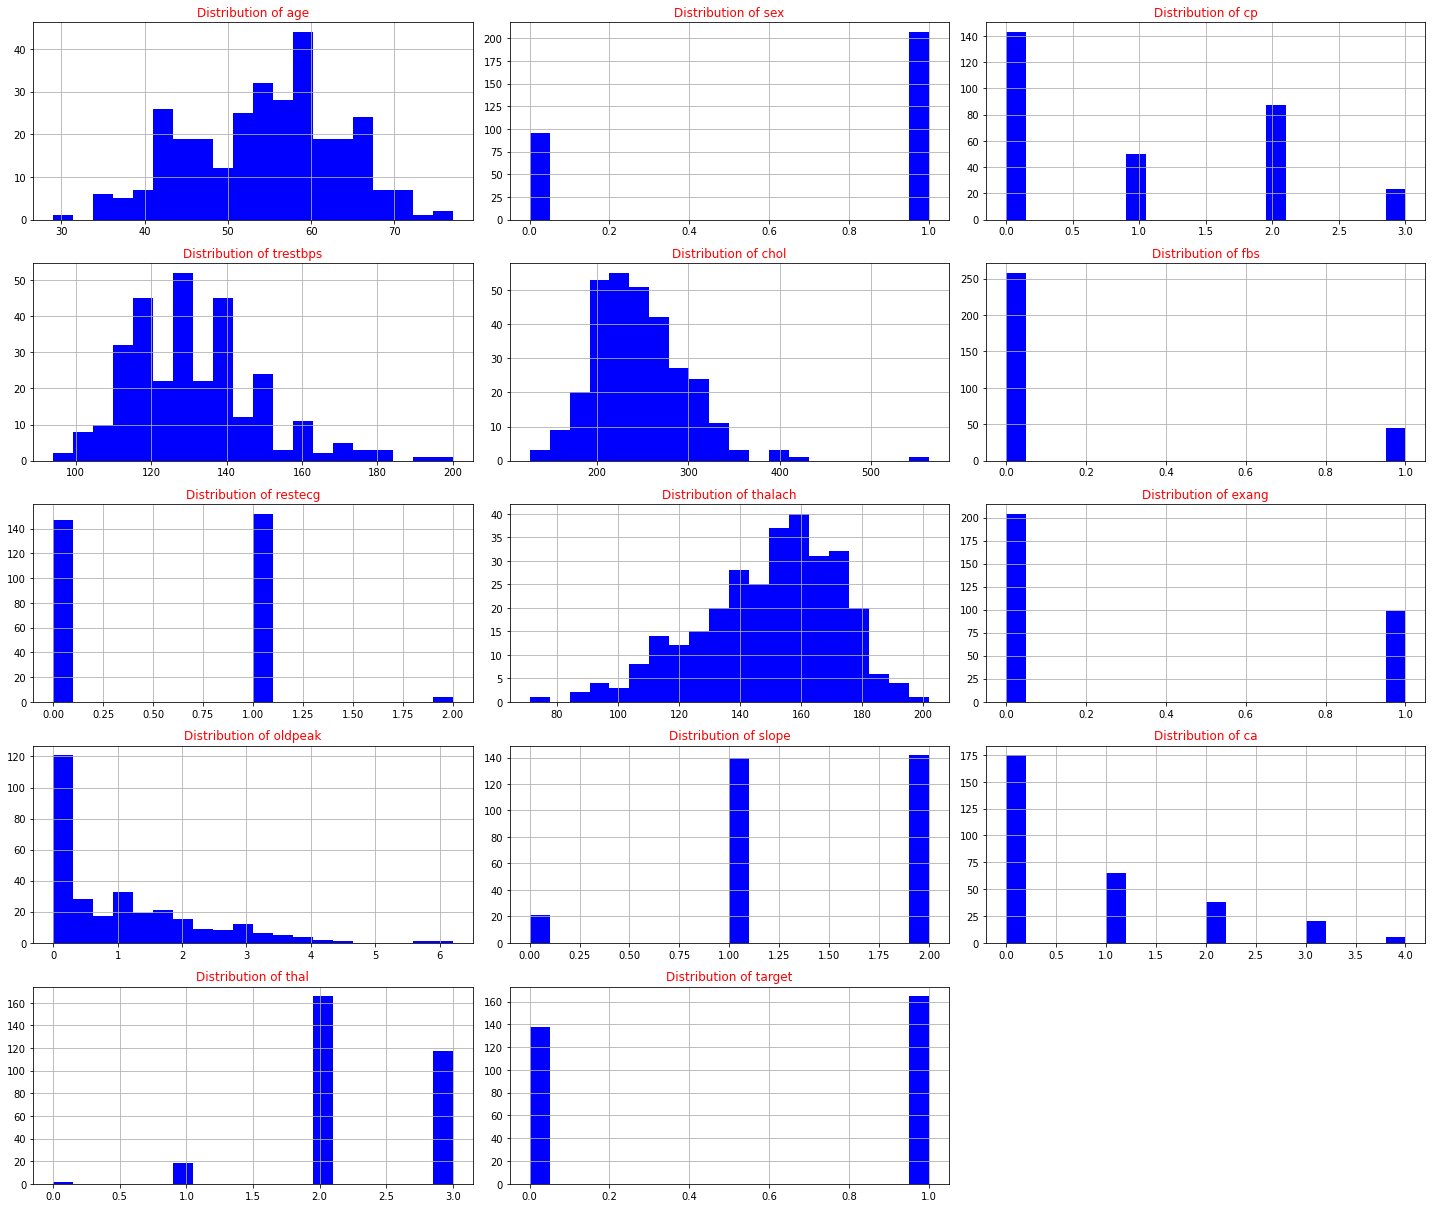

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title("Distribution of " + feature,color='Red')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [ ]:
print(df[df['target']==1]['chol'].min())

126


In [ ]:
print(df[df['target']==0]['chol'].min())

131


In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [ ]:
print(categorical_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


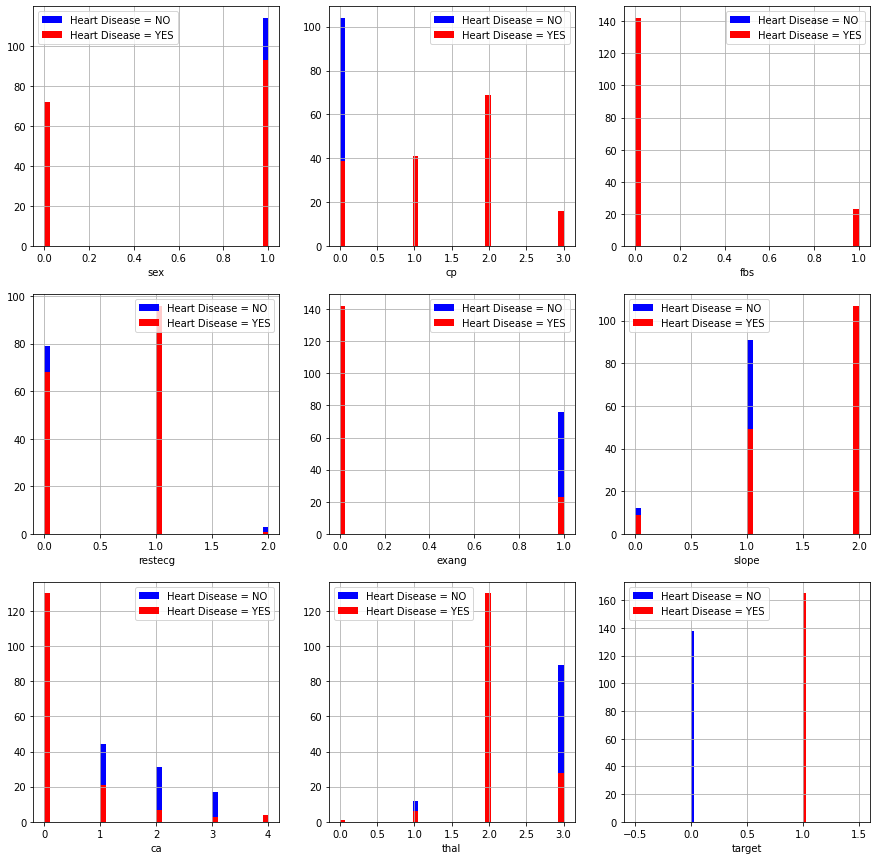

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=40, color='blue', label='Heart Disease = NO')
    df[df["target"] == 1][column].hist(bins=40, color='red', label='Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = model.predict(X_test)
clf_report = classification_report(y_test, pred)
print("Test Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 78.69%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

_______________________________________________
Confusion Matrix: 
 [[24  8]
 [ 5 24]]

